# here we will now visualize all four data

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

CHEAPCARS = pd.read_csv('cheapcars.csv').to_numpy()
BUDGETCARS = pd.read_csv('budgetcars.csv').to_numpy()
MIDRANGECARS = pd.read_csv('midrangecars.csv').to_numpy()
LUXURYCARS = pd.read_csv('luxurycars.csv').to_numpy()
ALLCARS = pd.read_csv('CleanDataNP.csv').to_numpy()

let's visualise mean and median price of each of the 4 data sets (cheapcars, budgetcars, midrangecars, luxurycars)

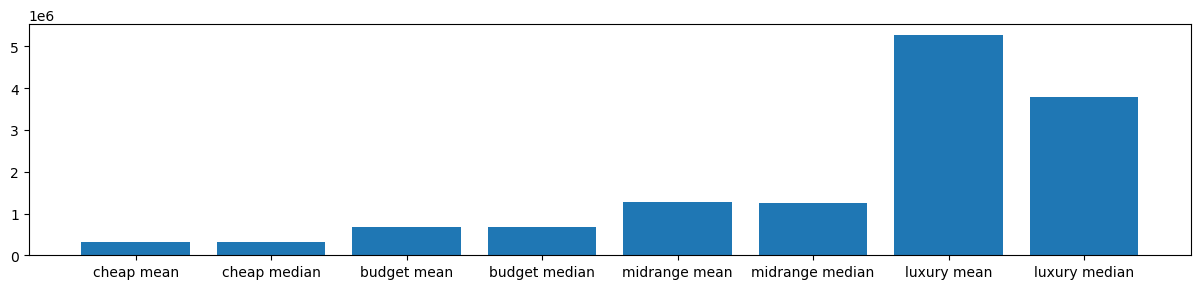

In [18]:
plt.figure(figsize=(15,3))
plt.bar(['cheap mean', 'cheap median', 'budget mean', 'budget median', 'midrange mean', 'midrange median', 'luxury mean', 'luxury median'], [np.mean(CHEAPCARS[:, 8]), np.median(CHEAPCARS[:, 8]), np.mean(BUDGETCARS[:, 8]), np.median(BUDGETCARS[:, 8]), np.mean(MIDRANGECARS[:, 8]), np.median(MIDRANGECARS[:, 8]), np.mean(LUXURYCARS[:, 8]), np.median(LUXURYCARS[:, 8])])
plt.show()

now let's see how the data is ditributed among cheap, budget, midrange and luxury cars.

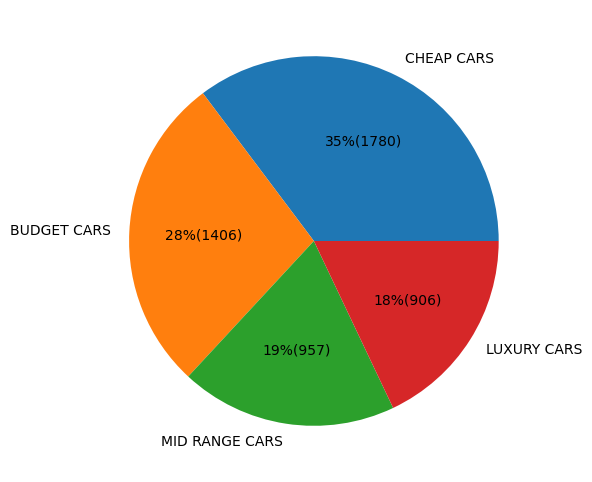

In [27]:
total = len(CHEAPCARS) + len(BUDGETCARS) + len(MIDRANGECARS) + len(LUXURYCARS)

plt.figure(figsize=(6, 6))
plt.pie(
    [len(CHEAPCARS), len(BUDGETCARS), len(MIDRANGECARS), len(LUXURYCARS)],
    labels=['CHEAP CARS', 'BUDGET CARS', 'MID RANGE CARS', 'LUXURY CARS'],
    autopct=lambda p: '{:.0f}%({:.0f})'.format(p, (p/100)*total)
)
plt.show()

## Frequency of cars of different prices

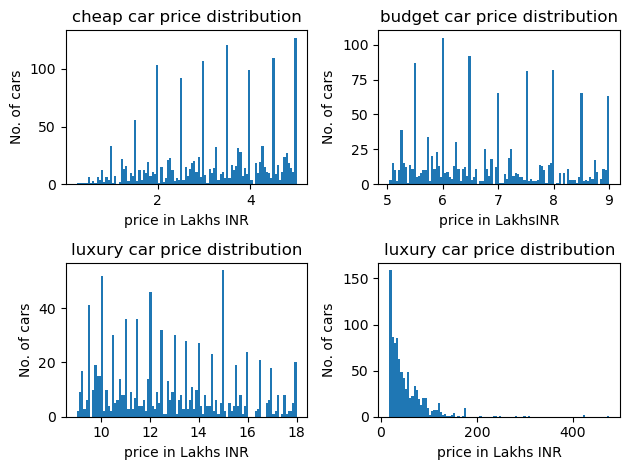

In [79]:
fig, axes = plt.subplots(2,2)

axes[0,0].hist(CHEAPCARS[:, -2]/100000, bins=100)
axes[0,0].set_ylabel('No. of cars')
axes[0,0].set_xlabel('price in Lakhs INR')
axes[0,0].set_title('cheap car price distribution')

axes[0,1].hist(BUDGETCARS[:, -2]/100000, bins=100)
axes[0,1].set_ylabel('No. of cars')
axes[0,1].set_xlabel('price in LakhsINR')
axes[0,1].set_title('budget car price distribution')

axes[1,0].hist(MIDRANGECARS[:, -2]/100000, bins=100)
axes[1,0].set_ylabel('No. of cars')
axes[1,0].set_xlabel('price in Lakhs INR')
axes[1,0].set_title('luxury car price distribution')

axes[1,1].hist(LUXURYCARS[:, -2]/100000, bins=100)
axes[1,1].set_ylabel('No. of cars')
axes[1,1].set_xlabel('price in Lakhs INR')
axes[1,1].set_title('luxury car price distribution')

fig.tight_layout()
plt.show()

## Price vs Age
let's try to visualize the relationship between price and age of vehicles in each categories

C:\Users\Shashi\AppData\Local\Temp\ipykernel_5988\3385208225.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figs.show()


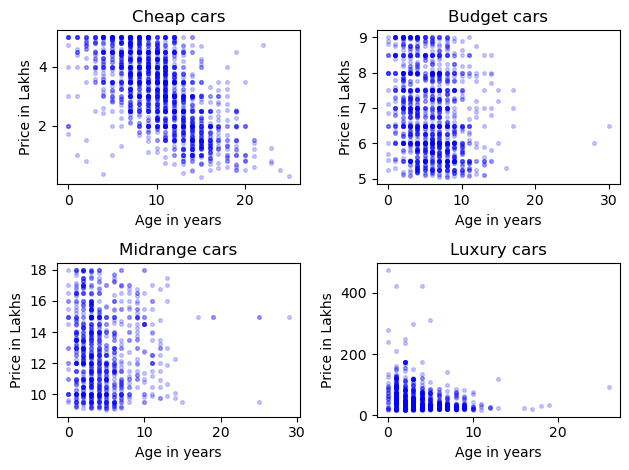

In [80]:
figs, axess = plt.subplots(2,2)

axess[0, 0].scatter(CHEAPCARS[:, 0], CHEAPCARS[:, -2]/100000, s=7, c='blue', alpha=0.2)
axess[0, 0].set_xlabel('Age in years')
axess[0, 0].set_ylabel('Price in Lakhs')
axess[0, 0].set_title('Cheap cars')

axess[0, 1].scatter(BUDGETCARS[:, 0], BUDGETCARS[:, -2]/100000, s=7, c='blue', alpha=0.2)
axess[0, 1].set_xlabel('Age in years')
axess[0, 1].set_ylabel('Price in Lakhs')
axess[0, 1].set_title('Budget cars')

axess[1, 0].scatter(MIDRANGECARS[:, 0], MIDRANGECARS[:, -2]/100000, s=7, c='blue', alpha=0.2)
axess[1, 0].set_xlabel('Age in years')
axess[1, 0].set_ylabel('Price in Lakhs')
axess[1, 0].set_title('Midrange cars')

axess[1, 1].scatter(LUXURYCARS[:, 0], LUXURYCARS[:, -2]/100000, s=7, c='blue', alpha=0.2)
axess[1, 1].set_xlabel('Age in years')
axess[1, 1].set_ylabel('Price in Lakhs')
axess[1, 1].set_title('Luxury cars')


figs.tight_layout()
figs.show()

## Price vs KMs Driven
let's try to visualize the relationship between price and distance car was driven

C:\Users\Shashi\AppData\Local\Temp\ipykernel_5988\3539586689.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figs.show()


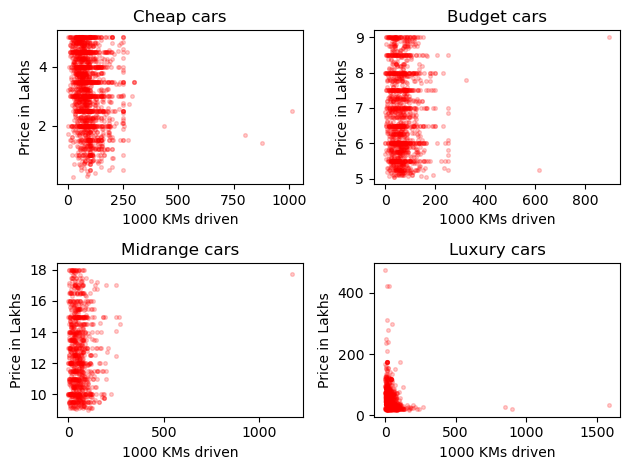

In [81]:
figs, axess = plt.subplots(2,2)

axess[0, 0].scatter(CHEAPCARS[:, 2]/1000, CHEAPCARS[:, -2]/100000, s=7, c='red', alpha=0.2)
axess[0, 0].set_xlabel('1000 KMs driven')
axess[0, 0].set_ylabel('Price in Lakhs')
axess[0, 0].set_title('Cheap cars')

axess[0, 1].scatter(BUDGETCARS[:, 2]/1000, BUDGETCARS[:, -2]/100000, s=7, c='red', alpha=0.2)
axess[0, 1].set_xlabel('1000 KMs driven')
axess[0, 1].set_ylabel('Price in Lakhs')
axess[0, 1].set_title('Budget cars')

axess[1, 0].scatter(MIDRANGECARS[:, 2]/1000, MIDRANGECARS[:, -2]/100000, s=7, c='red', alpha=0.2)
axess[1, 0].set_xlabel('1000 KMs driven')
axess[1, 0].set_ylabel('Price in Lakhs')
axess[1, 0].set_title('Midrange cars')

axess[1, 1].scatter(LUXURYCARS[:, 2]/1000, LUXURYCARS[:, -2]/100000, s=7, c='red', alpha=0.2)
axess[1, 1].set_xlabel('1000 KMs driven')
axess[1, 1].set_ylabel('Price in Lakhs')
axess[1, 1].set_title('Luxury cars')


figs.tight_layout()
figs.show()